## Imports

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

sns.set_style('white')
%matplotlib inline

## The Data

In [200]:
path = os.getcwd()
yelp = pd.read_csv(path+'/data/yelp.csv')

In [201]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [202]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [203]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**We create a new column called "text length" which is the number of words in the text column**

In [204]:
yelp['text length']=yelp['text'].apply(len)

# EDA

Let's explore the data

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns

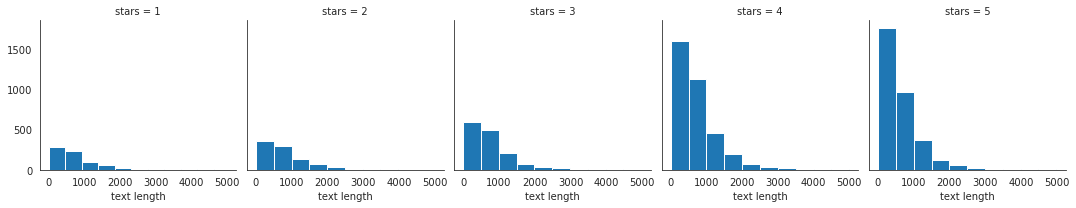

In [206]:
#A  grid of 5 histograms of text length based off of the star ratings
g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text length')

<AxesSubplot:xlabel='stars', ylabel='text length'>

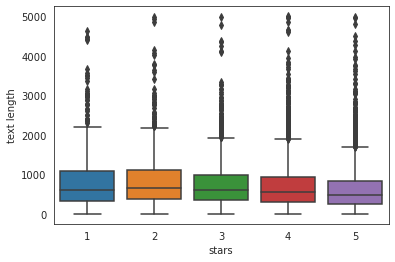

In [207]:
# A boxplot of text length for each star category
sns.boxplot(x='stars', y='text length', data=yelp)

<AxesSubplot:xlabel='stars', ylabel='count'>

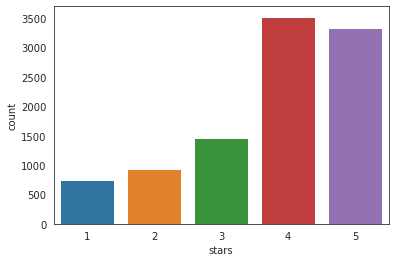

In [208]:
# A countplot of the number of occurrences for each type of star rating
sns.countplot(x='stars', data=yelp)

<AxesSubplot:>

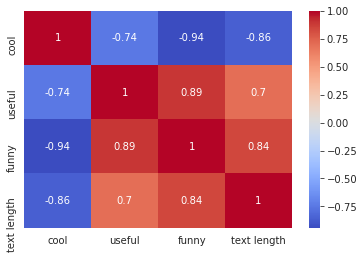

In [209]:
# A heatmap based off depicting the data correlation
stars = yelp.groupby('stars').mean()
sns.heatmap(stars.corr(),cmap='coolwarm',annot=True)  

## NLP Classification Task

Let's move to the main task. We only grab reviews that were either 1 star or 5 stars, due to the fact that we will try to classify in these two categories



In [210]:
yelp_class = yelp[(yelp['stars']==1) | (yelp['stars']==5)]

X = yelp_class['text']
y = yelp_class['stars']

In [211]:
yelp_class['text'].head()

0    My wife took me here on my birthday for breakf...
1    I have no idea why some people give bad review...
3    Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4    General Manager Scott Petello is a good egg!!!...
6    Drop what you're doing and drive here. After I...
Name: text, dtype: object

In [212]:
# We import CountVectorizer and create a CountVectorizer object
cv = CountVectorizer()

X = cv.fit_transform(X) # fit the data

## Train Test Split

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

## Training a Model

In [214]:
# We will test different classifiers and compare them

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

nb = MultinomialNB()
rf = RandomForestClassifier()
lg = LogisticRegression()
sgd = SGDClassifier()

In [215]:
nb.fit(X_train,y_train)
rf.fit(X_train,y_train)
lg.fit(X_train,y_train)
sgd.fit(X_train,y_train)

/home/adam/anaconda3/envs/MLCourse/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SGDClassifier()

## Predictions and Evaluations

In [216]:
predictions1 = nb.predict(X_test)
predictions2 = rf.predict(X_test)
predictions3 = lg.predict(X_test)
predictions4 = sgd.predict(X_test)

In [217]:
# MultinomialNB

con_mat = confusion_matrix(y_test,predictions1)
print(pd.DataFrame(con_mat))



print('\n')
print(classification_report(y_test,predictions1))



     0    1
0  159   69
1   22  976


              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



In [218]:
# RandomForestClassifier 

con_mat = confusion_matrix(y_test,predictions2)
print(pd.DataFrame(con_mat))

print('\n')
print(classification_report(y_test,predictions2))

    0    1
0  52  176
1   2  996


              precision    recall  f1-score   support

           1       0.96      0.23      0.37       228
           5       0.85      1.00      0.92       998

    accuracy                           0.85      1226
   macro avg       0.91      0.61      0.64      1226
weighted avg       0.87      0.85      0.82      1226



In [219]:
# LogisticRegression

con_mat = confusion_matrix(y_test,predictions3)
print(pd.DataFrame(con_mat))

print('\n')
print(classification_report(y_test,predictions3))

     0    1
0  175   53
1   26  972


              precision    recall  f1-score   support

           1       0.87      0.77      0.82       228
           5       0.95      0.97      0.96       998

    accuracy                           0.94      1226
   macro avg       0.91      0.87      0.89      1226
weighted avg       0.93      0.94      0.93      1226



In [220]:
# SGDClassifier

con_mat = confusion_matrix(y_test,predictions4)
print(pd.DataFrame(con_mat))

print('\n')
print(classification_report(y_test,predictions4))

     0    1
0  165   63
1   18  980


              precision    recall  f1-score   support

           1       0.90      0.72      0.80       228
           5       0.94      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.92      0.85      0.88      1226
weighted avg       0.93      0.93      0.93      1226



Based on the accouracy the Random Forest Classifier performs poorer than the other classifiers, but in order to choose a classifier we always need to consider which question is more important for us. For example, in the case we where trying to predict specifically which reviews will be classfied as 5 star, Random Forest Classifier outperforms the rest classifiers.

# Using Text Processing

**Let's see what happens if we try to include TF-IDF to this process using a pipeline.**

In [221]:
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.pipeline import Pipeline

** We create different pipelines using different classifiers**

In [222]:
pipeline1 = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

pipeline2 = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors w/ Random Forest classifier
])

pipeline3 = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression()),  # train on TF-IDF vectors w/ Logistic Regression classifier
])

pipeline4 = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SGDClassifier()),  # train on TF-IDF vectors w/ Logistic Regression classifier
])

## Using the Pipeline

**This pipeline has all the pre-process steps in it already, meaning we'll need to re-split the original data (Remember that we overwrote X as the CountVectorized version. What we need is just the text**

### Train Test Split

In [223]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [224]:
# We fit the pipelines to the training data

pipeline1.fit(X_train,y_train)
pipeline2.fit(X_train,y_train)
pipeline3.fit(X_train,y_train)
pipeline4.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', SGDClassifier())])

### Predictions and Evaluation

In [225]:
predictions1 = pipeline1.predict(X_test)
predictions2 = pipeline2.predict(X_test)
predictions3 = pipeline3.predict(X_test)
predictions4 = pipeline4.predict(X_test)

In [226]:
con_mat = confusion_matrix(y_test,predictions1)
print(pd.DataFrame(con_mat))

print(classification_report(y_test,predictions1))

   0    1
0  0  228
1  0  998
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



/home/adam/anaconda3/envs/MLCourse/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adam/anaconda3/envs/MLCourse/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/adam/anaconda3/envs/MLCourse/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [227]:
con_mat = confusion_matrix(y_test,predictions2)
print(pd.DataFrame(con_mat))

print(classification_report(y_test,predictions2))

    0    1
0  42  186
1   1  997
              precision    recall  f1-score   support

           1       0.98      0.18      0.31       228
           5       0.84      1.00      0.91       998

    accuracy                           0.85      1226
   macro avg       0.91      0.59      0.61      1226
weighted avg       0.87      0.85      0.80      1226



In [228]:
con_mat = confusion_matrix(y_test,predictions3)
print(pd.DataFrame(con_mat))

print(classification_report(y_test,predictions3))

    0    1
0  99  129
1   2  996
              precision    recall  f1-score   support

           1       0.98      0.43      0.60       228
           5       0.89      1.00      0.94       998

    accuracy                           0.89      1226
   macro avg       0.93      0.72      0.77      1226
weighted avg       0.90      0.89      0.88      1226



In [229]:
con_mat = confusion_matrix(y_test,predictions4)
print(pd.DataFrame(con_mat))

print(classification_report(y_test,predictions4))

     0    1
0  180   48
1   16  982
              precision    recall  f1-score   support

           1       0.92      0.79      0.85       228
           5       0.95      0.98      0.97       998

    accuracy                           0.95      1226
   macro avg       0.94      0.89      0.91      1226
weighted avg       0.95      0.95      0.95      1226



Apparently Tf-Idf actually made things worse, but this is not true for all cases. We can see that in the case that we use `SGDClassifier` as classifier the model slightly improved reaching an accuracy around 95%!